### Statistiek
Hier vind je de algemene verwerking van de data

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### data inladen
wedstrijden = pd.read_excel('../../Data/Silver/wedstrijden_cleaned.xlsx')
corners = pd.read_excel('../../Data/Silver/cornerballen_cleaned.xlsx')

merged_df = pd.merge(wedstrijden, corners, on='wedstrijd_id', how='left')


<Axes: title={'center': 'Aantal wedstrijden per niveau'}, xlabel='Niveau', ylabel='Aantal wedstrijden'>

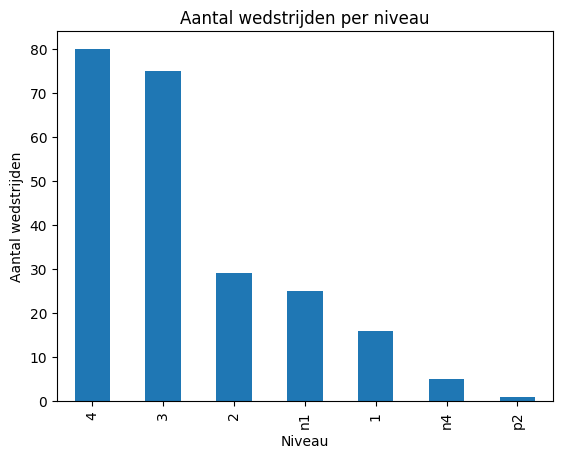

In [6]:
# distributie van de wedstrijden per niveau

wedstrijden["niveau"].value_counts().plot(kind='bar', title='Aantal wedstrijden per niveau', xlabel='Niveau', ylabel='Aantal wedstrijden')


### scorepercentages

In [ ]:
### scorepercentages
# algemeen
# aantal wedstrijden
aantal_wedstrijden = wedstrijden["wedstrijd_id"].nunique()
print(f"Aantal wedstrijden: {aantal_wedstrijden}")

# aantal schepcorners
aantal_schepcorners = corners.shape[0]
print(f"Aantal schepcorners: {aantal_schepcorners}")
print(f"gemiddeld aantal schepcorner per wedstrijd: {aantal_schepcorners/aantal_wedstrijden:.2f}")

# aantal gescoorde schepcorners
gescoorde_schepcorners = corners["goal"].sum()
print(f"Aantal gescoorde schepcorners: {gescoorde_schepcorners}")
scorepercentage = gescoorde_schepcorners / aantal_schepcorners * 100    
print(f"Scorepercentage: {scorepercentage:.2f}%")

Aantal wedstrijden: 231
Aantal schepcorners: 603
gemiddeld aantal schepcorner per wedstrijd: 2.61
Aantal gescoorde schepcorners: 399
Scorepercentage: 66.17%


In [24]:
# verschil van de scorepercentages per niveau
scorepercentages_per_niveau = merged_df.groupby("niveau")["goal"].mean() * 100


# aantal wedstrijden per niveau
aantal_wedstrijden_per_niveau = merged_df.groupby("niveau")["wedstrijd_id"].nunique()

# aantal schepcorners per niveau
aantal_schepcorners_per_niveau = merged_df.groupby("niveau")["schepcorner_id"].nunique()

# merge de dataframes
niveau_distributie = pd.DataFrame({
    "aantal_wedstrijden": aantal_wedstrijden_per_niveau,
    "aantal_schepcorners": aantal_schepcorners_per_niveau,
    "scorepercentage": scorepercentages_per_niveau
}).reset_index()
niveau_distributie

,niveau,aantal_wedstrijden,aantal_schepcorners,scorepercentage
0,1,16,42,69.047619
1,2,29,75,72.000000
2,3,75,182,63.736264
3,4,80,206,57.766990
4,n1,25,81,86.419753
5,n4,5,13,76.923077
6,p2,1,4,25.000000


In [47]:
def plot_barchart_with_annotations(df, x_column, y_column, annotation_column, x_label, y_label, titel, hoogte=30):
    """
    Functie om een balkgrafiek te plotten met annotaties boven de balken.
    
    Parameters:
    - df: DataFrame met de data
    - x_column: naam van de kolom voor de x-as (bijv. 'kwart')
    - y_column: naam van de kolom voor de y-as (bijv. 'aantal_schepcorners')
    - annotation_column: naam van de kolom voor annotaties boven de balken (bijv. 'scorepercentage')
    - x_label: label voor de x-as
    - y_label: label voor de y-as
    - titel: titel van de grafiek
    """
    # Academische stijl instellen
    sns.set_theme(style="whitegrid", font_scale=1.2, rc={
        'axes.edgecolor': 'black',
        'axes.labelweight': 'bold',
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.labelsize': 11,
        'ytick.labelsize': 11,
        'font.family': 'serif'
    })
    
    plt.figure(figsize=(8, 5))
    
    # Balkgrafiek: y-as en x-as instellen
    ax = sns.barplot(
        data=df,
        x=x_column,
        y=y_column,
        color='grey',
        edgecolor='black'
    )
    
    # Annotaties: scorepercentage boven elke balk
    for i, row in df.iterrows():
        ax.text(
            i, row[y_column] + 3,  # Plaatsing van de annotatie boven de balk
            f"{row[annotation_column]:.1f}% \ngescoord",  # Format van de annotatie (scorepercentage)
            ha='center', va='bottom',
            fontsize=10, fontstyle='italic'
        )
    
    # Aslabels en titel
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(titel, pad=15)
    
    # Y-as iets boven hoogste waarde laten uitkomen voor ruimte
    plt.ylim(0, df[y_column].max() + hoogte)
    plt.tight_layout()
    
    # Weergeven van de grafiek
    plt.show()

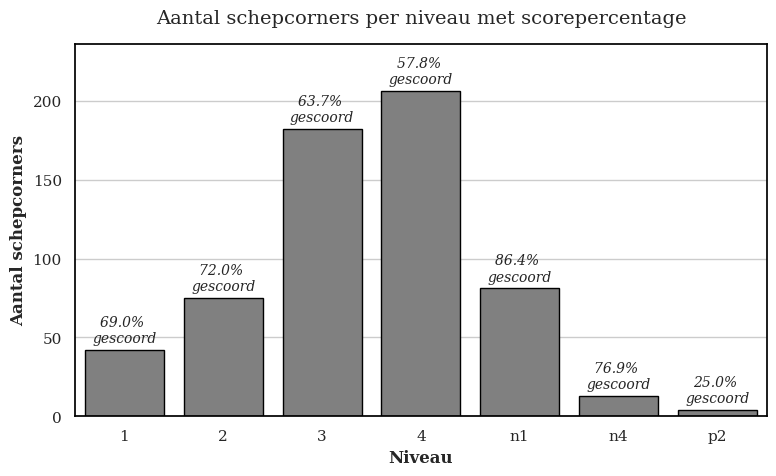

In [40]:
plot_barchart_with_annotations(
    niveau_distributie,
    x_column='niveau',
    y_column='aantal_schepcorners',
    annotation_column='scorepercentage',
    x_label='Niveau',
    y_label='Aantal schepcorners',
    titel='Aantal schepcorners per niveau met scorepercentage'
)

In [ ]:
### percentage per kwart
# aantal schepcorners per kwart
aantal_schepcorners_per_kwart = corners["kwart"].value_counts()

# aantal gescoorde schepcorners per kwart
aantal_gescoord_per_kwart = corners.groupby("kwart")["goal"].sum()

kwart_distributie = pd.DataFrame({
    "aantal_schepcorners": aantal_schepcorners_per_kwart,
    "aantal_gescoord": aantal_gescoord_per_kwart,
    "scorepercentage": aantal_gescoord_per_kwart / aantal_schepcorners_per_kwart * 100
}).reset_index()
kwart_distributie



,kwart,aantal_schepcorners,aantal_gescoord,scorepercentage
0,1,63,47,74.603175
1,2,168,118,70.238095
2,3,205,131,63.902439
3,4,167,103,61.676647


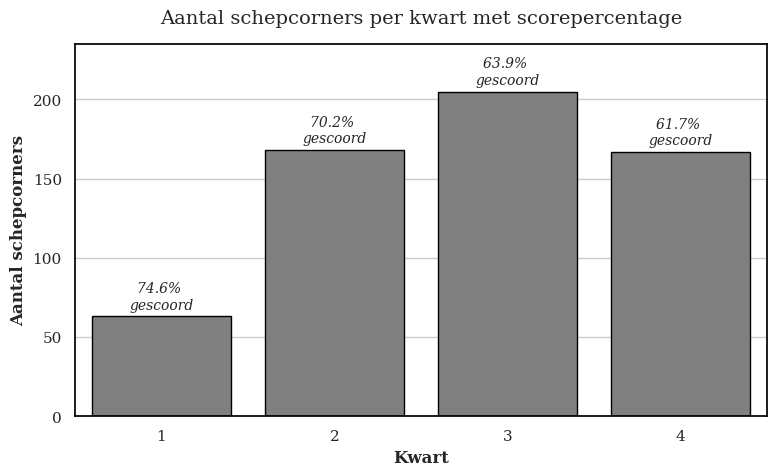

In [41]:
plot_barchart_with_annotations(
    kwart_distributie,
    x_column='kwart',
    y_column='aantal_schepcorners',
    annotation_column='scorepercentage',
    x_label='Kwart',
    y_label='Aantal schepcorners',
    titel='Aantal schepcorners per kwart met scorepercentage'
)

In [54]:
def calculate_distribution_by_column(df, column_name):
    """
    Functie om het aantal schepcorners per unieke waarde van een opgegeven kolom te berekenen,
    evenals het scorepercentage (aantal gescoorde schepcorners / aantal schepcorners).
    
    Parameters:
    - df: DataFrame met de data
    - column_name: naam van de kolom waarvoor de verdeling berekend moet worden
    
    Returns:
    - DataFrame met de kolommen voor de opgegeven 'column_name', 'aantal_schepcorners', 'aantal_gescoord', 'scorepercentage'
    """
    # Aantal schepcorners per waarde van de opgegeven kolom
    aantal_schepcorners_per_value = df[column_name].value_counts()

    # Aantal gescoorde schepcorners per waarde van de opgegeven kolom
    aantal_gescoord_per_value = df.groupby(column_name)["goal"].sum()

    # DataFrame met de verdeling
    distributie_df = pd.DataFrame({
        "aantal_schepcorners": aantal_schepcorners_per_value,
        "aantal_gescoord": aantal_gescoord_per_value,
        "scorepercentage": aantal_gescoord_per_value / aantal_schepcorners_per_value * 100
    }).reset_index()
        
    return distributie_df

In [55]:
schepper_positie_distributie = calculate_distribution_by_column(corners, "schepper_pos_rechts")
schepper_positie_distributie['schepper_pos_rechts'] = schepper_positie_distributie['schepper_pos_rechts'].replace({1: 'Rechts', 0: 'Links'})
schepper_positie_distributie


,schepper_pos_rechts,aantal_schepcorners,aantal_gescoord,scorepercentage
0,Links,167,109,65.269461
1,Rechts,436,290,66.513761


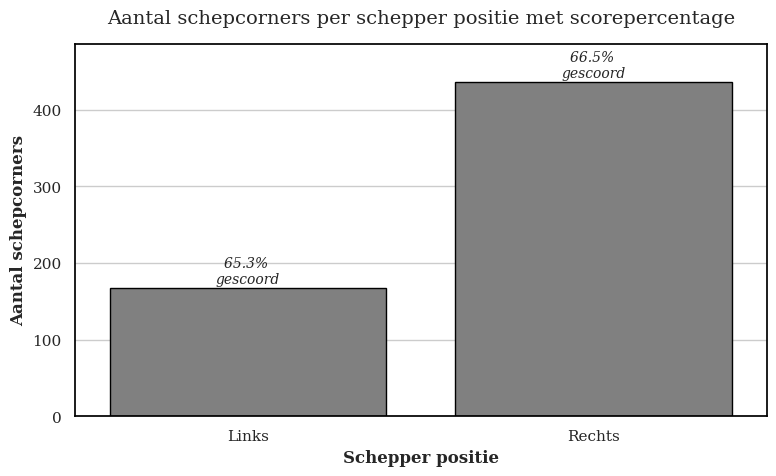

In [56]:
plot_barchart_with_annotations(schepper_positie_distributie,
    x_column='schepper_pos_rechts',
    y_column='aantal_schepcorners',
    annotation_column='scorepercentage',
    x_label='Schepper positie',
    y_label='Aantal schepcorners',
    titel='Aantal schepcorners per schepper positie met scorepercentage',
    hoogte=50
)

In [57]:
kopper_positie_distributie = calculate_distribution_by_column(corners, "positie")
kopper_positie_distributie['positie'] = kopper_positie_distributie['positie'].replace({1: 'Linksvoor', 2: 'Middenvoor', 3: 'Rechtsvoor', 4: 'Linksachter', 5: 'Middenachter', 6: 'Rechtsachter'})
kopper_positie_distributie

,positie,aantal_schepcorners,aantal_gescoord,scorepercentage
0,Linksvoor,11,6,54.545455
1,Middenvoor,188,130,69.148936
2,Rechtsvoor,17,10,58.823529
3,Linksachter,32,19,59.375000
4,Middenachter,332,218,65.662651
5,Rechtsachter,23,16,69.565217


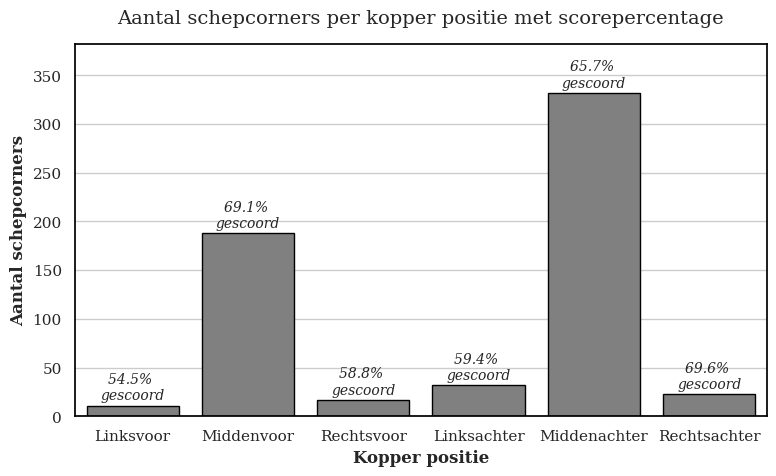

In [58]:
plot_barchart_with_annotations(
    kopper_positie_distributie,
    x_column='positie',
    y_column='aantal_schepcorners',
    annotation_column='scorepercentage',
    x_label='Kopper positie',
    y_label='Aantal schepcorners',
    titel='Aantal schepcorners per kopper positie met scorepercentage',
    hoogte=50
)